#Solubility prediction

AqSolDB: A curated reference set of aqueous solubility and 2D descriptors for a diverse set of compounds

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/curated-solubility-dataset.csv')

In [3]:
selection = ['ID','SMILES','Solubility']
df1 = df[selection]
df1

ID                                             SMILES  Solubility
0      A-3                [Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C   -3.616127
1      A-4                               O=C1Nc2cccc3cccc1c23   -3.254767
2      A-5                                    Clc1ccc(C=O)cc1   -2.177078
3      A-8  [Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...   -3.924409
4      A-9  C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...   -4.662065
...    ...                                                ...         ...
9977  I-84                     C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C   -3.010000
9978  I-85  OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...   -2.930000
9979  I-86                                c1(cc(ccc1C(C)C)C)O   -2.190000
9980  I-93  COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...   -3.980000
9981  I-94              CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O   -4.780000

[9982 rows x 3 columns]

In [4]:
df1.Solubility.describe()

count    9982.000000
mean       -2.889909
std         2.368154
min       -13.171900
25%        -4.326325
50%        -2.618173
75%        -1.209735
max         2.137682
Name: Solubility, dtype: float64

In [5]:
solubility_threshold = []
for i in df1.Solubility:
  if float(i) >= -3:
    solubility_threshold.append("soluble")
  elif float(i) <= -8:
    solubility_threshold.append("insoluble")
  else:
    solubility_threshold.append("intermediate")

In [6]:
solubility_class = pd.Series(solubility_threshold, name='class')
df2 = pd.concat([df1,solubility_class], axis=1)
df2

ID                                             SMILES  Solubility  \
0      A-3                [Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C   -3.616127   
1      A-4                               O=C1Nc2cccc3cccc1c23   -3.254767   
2      A-5                                    Clc1ccc(C=O)cc1   -2.177078   
3      A-8  [Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...   -3.924409   
4      A-9  C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...   -4.662065   
...    ...                                                ...         ...   
9977  I-84                     C(c1ccc(cc1)NCCCC)(=O)OCCN(C)C   -3.010000   
9978  I-85  OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...   -2.930000   
9979  I-86                                c1(cc(ccc1C(C)C)C)O   -2.190000   
9980  I-93  COc1ccc(CCN(C)CCCC(C#N)(C(C)C)c2ccc(OC)c(OC)c2...   -3.980000   
9981  I-94              CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O   -4.780000   

             class  
0     intermediate  
1     intermediate  
2          soluble  
3     intermediate  
4     intermediate  
...            ...  
9977  intermediate  
9978       soluble  
9979       soluble  
9980  intermediate  
9981  intermediate  

[9982 rows x 4 columns]

In [7]:
df_2class = df2[df2['class'] != 'intermediate']
df_2class

ID                                             SMILES  Solubility  \
2      A-5                                    Clc1ccc(C=O)cc1   -2.177078   
7     A-12  CC12CC(O)C3C(CCC4=CC(=O)C=CC34C)C1CC(O)C2(O)C(...   -2.664549   
10    A-17                                 CN(C)c1ccc(C=O)cc1   -2.282769   
11    A-18                            CC(=O)OC(C)(C)Cc1ccccc1   -2.394650   
12    A-19  Cc1ccc(O)c(C)c1.Cc2ccc(C)c(O)c2.Cc3cc(C)cc(O)c...   -1.980310   
...    ...                                                ...         ...   
9970  I-74  [H]C1(CN2CCC1C[C@@]2([H])[C@H](O)C1=CC=NC2=C1C...   -2.790000   
9971  I-75             S(Cc1oc(CN(C)C)cc1)CCN\C(NC)=C\N(=O)=O   -2.500000   
9974  I-79              S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1   -2.730000   
9978  I-85  OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...   -2.930000   
9979  I-86                                c1(cc(ccc1C(C)C)C)O   -2.190000   

        class  
2     soluble  
7     soluble  
10    soluble  
11    soluble  
12    soluble  
...       ...  
9970  soluble  
9971  soluble  
9974  soluble  
9978  soluble  
9979  soluble  

[5967 rows x 4 columns]

In [8]:
!pip install seaborn

     |████████████████████████████████| 293 kB 4.3 MB/s 
     |████████████████████████████████| 11.2 MB 46.4 MB/s 
     |████████████████████████████████| 1.1 MB 62.4 MB/s 
     |████████████████████████████████| 103 kB 35.7 MB/s 
     |████████████████████████████████| 965 kB 49.7 MB/s 


In [9]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

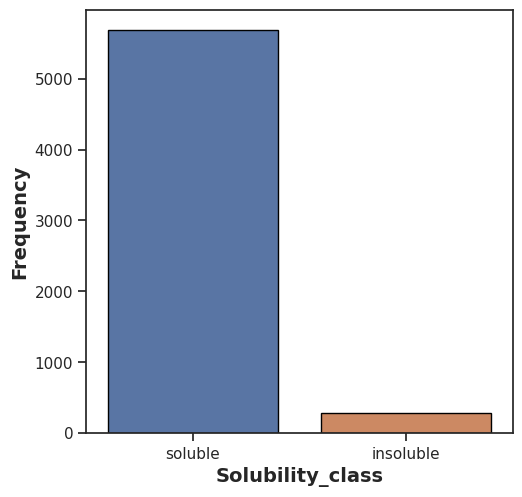

In [10]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Solubility_class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('solubility_class.pdf')

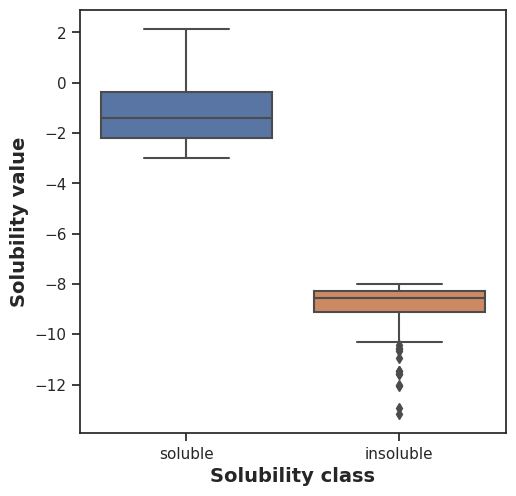

In [11]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'Solubility', data = df_2class)

plt.xlabel('Solubility class', fontsize=14, fontweight='bold')
plt.ylabel('Solubility value', fontsize=14, fontweight='bold')

plt.savefig('plot_solubility.pdf')

In [12]:
df_2class

ID                                             SMILES  Solubility  \
2      A-5                                    Clc1ccc(C=O)cc1   -2.177078   
7     A-12  CC12CC(O)C3C(CCC4=CC(=O)C=CC34C)C1CC(O)C2(O)C(...   -2.664549   
10    A-17                                 CN(C)c1ccc(C=O)cc1   -2.282769   
11    A-18                            CC(=O)OC(C)(C)Cc1ccccc1   -2.394650   
12    A-19  Cc1ccc(O)c(C)c1.Cc2ccc(C)c(O)c2.Cc3cc(C)cc(O)c...   -1.980310   
...    ...                                                ...         ...   
9970  I-74  [H]C1(CN2CCC1C[C@@]2([H])[C@H](O)C1=CC=NC2=C1C...   -2.790000   
9971  I-75             S(Cc1oc(CN(C)C)cc1)CCN\C(NC)=C\N(=O)=O   -2.500000   
9974  I-79              S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1   -2.730000   
9978  I-85  OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...   -2.930000   
9979  I-86                                c1(cc(ccc1C(C)C)C)O   -2.190000   

        class  
2     soluble  
7     soluble  
10    soluble  
11    soluble  
12    soluble  
...       ...  
9970  soluble  
9971  soluble  
9974  soluble  
9978  soluble  
9979  soluble  

[5967 rows x 4 columns]

In [13]:
! pip install padelpy

  Using cached padelpy-0.1.14-py2.py3-none-any.whl (20.9 MB)


In [16]:
selection = ['SMILES','ID']
df3_selection = df_2class[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [17]:
! cat molecule.smi | head -5

Clc1ccc(C=O)cc1	A-5
CC12CC(O)C3C(CCC4=CC(=O)C=CC34C)C1CC(O)C2(O)C(=O)CO	A-12
CN(C)c1ccc(C=O)cc1	A-17
CC(=O)OC(C)(C)Cc1ccccc1	A-18
Cc1ccc(O)c(C)c1.Cc2ccc(C)c(O)c2.Cc3cc(C)cc(O)c3.Cc4ccc(O)cc4C.Cc5cccc(O)c5C.Cc6cccc(C)c6O	A-19


In [18]:
! cat molecule.smi | wc -l

5967


In [19]:
! type padel.sh

/bin/bash: line 1: type: padel.sh: not found


In [20]:
! cat padel.sh

cat: padel.sh: No such file or directory


In [21]:
! "C:\Program Files\DBeaver\jre\bin\java.exe" -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./paDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./paDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv

/bin/bash: line 1: C:\Program Files\DBeaver\jre\bin\java.exe: command not found


In [22]:
! bash padel.sh

bash: padel.sh: No such file or directory


In [23]:
X = df_2class.drop('class', axis=1)
X

ID                                             SMILES  Solubility
2      A-5                                    Clc1ccc(C=O)cc1   -2.177078
7     A-12  CC12CC(O)C3C(CCC4=CC(=O)C=CC34C)C1CC(O)C2(O)C(...   -2.664549
10    A-17                                 CN(C)c1ccc(C=O)cc1   -2.282769
11    A-18                            CC(=O)OC(C)(C)Cc1ccccc1   -2.394650
12    A-19  Cc1ccc(O)c(C)c1.Cc2ccc(C)c(O)c2.Cc3cc(C)cc(O)c...   -1.980310
...    ...                                                ...         ...
9970  I-74  [H]C1(CN2CCC1C[C@@]2([H])[C@H](O)C1=CC=NC2=C1C...   -2.790000
9971  I-75             S(Cc1oc(CN(C)C)cc1)CCN\C(NC)=C\N(=O)=O   -2.500000
9974  I-79              S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1   -2.730000
9978  I-85  OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...   -2.930000
9979  I-86                                c1(cc(ccc1C(C)C)C)O   -2.190000

[5967 rows x 3 columns]

In [25]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-09-04 17:17:30--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   103MB/s    in 0.8s    

2023-09-04 17:17:31 (103 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
 

In [26]:
!pip install --upgrade rdkit

Requirement already up-to-date: rdkit in /usr/local/lib/python3.7/site-packages (2023.3.2)


In [27]:
!pip install numpy

In [28]:
!pip install boost

In [29]:
# Molecular representation and feature extraction
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors, Draw

In [30]:
# Linear regression models
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [31]:
# Create an array of molecule objects from SMILES strings in the DataFrame
molecules = df_2class.SMILES.map(Chem.MolFromSmiles).to_numpy()

[17:18:22] WARNING: not removing hydrogen atom without neighbors
[17:18:22] WARNING: not removing hydrogen atom without neighbors
[17:18:22] WARNING: not removing hydrogen atom without neighbors
[17:18:22] WARNING: not removing hydrogen atom without neighbors
[17:18:22] WARNING: not removing hydrogen atom without neighbors
[17:18:22] WARNING: not removing hydrogen atom without neighbors
[17:18:22] WARNING: not removing hydrogen atom without neighbors
[17:18:22] WARNING: not removing hydrogen atom without neighbors
[17:18:22] WARNING: not removing hydrogen atom without neighbors
[17:18:22] WARNING: not removing hydrogen atom without neighbors
[17:18:22] WARNING: not removing hydrogen atom without neighbors
[17:18:22] WARNING: not removing hydrogen atom without neighbors
[17:18:23] WARNING: not removing hydrogen atom without neighbors
[17:18:23] WARNING: not removing hydrogen atom without neighbors
[17:18:23] WARNING: not removing hydrogen atom without neighbors
[17:18:23] WARNING: not r

In [32]:
!pip install tools

In [38]:
def get_feature_array(mols):
    """
    Return an pd.DataFrame of molecule properties given an array (or array-like) of molecule objects

    Parameters
    ----------
    mols: array-like, array of molecule objects

    Returns
    ----------
    mol_features: pd.DataFrame of molecule features
    """
    entries = [get_predictors(mol) for mol in  mols]
    mol_features = pd.DataFrame(data=entries, dtype=float)
    return mol_features

def get_predictors(mol):
    """Return a dictionary of properties of an RDKit molecule object to be used as model predictors"""

    molecular_weight = Descriptors.MolWt(mol)
    oct_water_partition_coefficient = Descriptors.MolLogP(mol)
    num_rotatable_bonds = Descriptors.NumRotatableBonds(mol)
    aromatic_proportion = get_aromatic_proportion(mol)

    entry = {
        'MW': molecular_weight,
        'cLogP': oct_water_partition_coefficient,
        'RB': num_rotatable_bonds,
        'AP': aromatic_proportion
    }

    return entry


def get_aromatic_proportion(mol):
    """Return the calculated aromatic proportion of a molecule"""

    are_aromatic = sum([mol.GetAtomWithIdx(i).GetIsAromatic() for i in range(mol.GetNumAtoms())])
    are_heavy = Descriptors.HeavyAtomCount(mol)
    return are_aromatic / are_heavy


In [65]:
df_2class['class_int'] = pd.Categorical(df_2class['class']).codes
df_2class

<ipython-input-65-0a95906d2518>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2class['class_int'] = pd.Categorical(df_2class['class']).codes


ID                                             SMILES  Solubility  \
2      A-5                                    Clc1ccc(C=O)cc1   -2.177078   
7     A-12  CC12CC(O)C3C(CCC4=CC(=O)C=CC34C)C1CC(O)C2(O)C(...   -2.664549   
10    A-17                                 CN(C)c1ccc(C=O)cc1   -2.282769   
11    A-18                            CC(=O)OC(C)(C)Cc1ccccc1   -2.394650   
12    A-19  Cc1ccc(O)c(C)c1.Cc2ccc(C)c(O)c2.Cc3cc(C)cc(O)c...   -1.980310   
...    ...                                                ...         ...   
9970  I-74  [H]C1(CN2CCC1C[C@@]2([H])[C@H](O)C1=CC=NC2=C1C...   -2.790000   
9971  I-75             S(Cc1oc(CN(C)C)cc1)CCN\C(NC)=C\N(=O)=O   -2.500000   
9974  I-79              S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1   -2.730000   
9978  I-85  OC1=C(C(C2=C(O)[C@@](C(C(C(N)=O)=C(O)[C@H]3N(C...   -2.930000   
9979  I-86                                c1(cc(ccc1C(C)C)C)O   -2.190000   

        class  class_int  
2     soluble          1  
7     soluble          1  
10    soluble          1  
11    soluble          1  
12    soluble          1  
...       ...        ...  
9970  soluble          1  
9971  soluble          1  
9974  soluble          1  
9978  soluble          1  
9979  soluble          1  

[5967 rows x 5 columns]

In [66]:
Y = df_2class['class_int']
Y

2       1
7       1
10      1
11      1
12      1
       ..
9970    1
9971    1
9974    1
9978    1
9979    1
Name: class_int, Length: 5967, dtype: int8

In [67]:
X = get_feature_array(molecules)

In [68]:
X

MW     cLogP    RB        AP
0     140.569   2.15250   1.0  0.666667
1     376.449   0.52840   2.0  0.000000
2     149.193   1.56510   2.0  0.545455
3     192.258   2.57080   3.0  0.428571
4     733.002  12.05424   0.0  0.666667
...       ...       ...   ...       ...
5962  324.424   3.17320   4.0  0.416667
5963  314.411   1.45900  10.0  0.238095
5964  278.337   1.47644   3.0  0.631579
5965  444.440  -0.21440   2.0  0.187500
5966  150.221   2.82402   1.0  0.545455

[5967 rows x 4 columns]

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=101)

In [70]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier()

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():

    # Fit the classifier
    models[key].fit(x_train, y_train)

    # Make predictions
    predictions = models[key].predict(x_test)

    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [74]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

Accuracy  Precision    Recall
Logistic Regression      0.989946   0.997887  0.991603
Support Vector Machines  0.975871   0.995775  0.979224
Decision Trees           0.985255   0.991549  0.992948
Random Forest            0.989946   0.996479  0.992982
Naive Bayes              0.951743   0.973944  0.975317
K-Nearest Neighbor       0.974531   0.997887  0.975895